# Data Pre-processing

In [2085]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2135]:
raw_data1 = pd.read_csv(r"D:/FYP_ML/AI_DATA/S4_3_08_004.txt", names=["Timestamp", "Position", "Reaction Force","Apllied Force","Impedence"])

# Feature Extraction

In [2136]:
initial_timestamp = raw_data1["Timestamp"][1]

In [2137]:
initial_timestamp

-2059768845

In [2138]:
raw_data1["Timestamp"] = (raw_data1["Timestamp"] - initial_timestamp)/10e5

In [2139]:
raw_data1["Timestamp"] 

0         -0.000077
1          0.000000
2          0.000038
3          0.000075
4          0.000111
            ...    
349995    11.659907
349996    11.659940
349997    11.659972
349998    11.660005
349999    11.660038
Name: Timestamp, Length: 350000, dtype: float64

In [2140]:
x_r = pd.DataFrame({'Position':raw_data1['Position']})
f_r = pd.DataFrame({'Reaction Force':raw_data1['Reaction Force']})
f_r = pd.DataFrame({'Impedence':raw_data1['Impedence']})

In [2141]:
raw_data1

,Timestamp,Position,Reaction Force,Apllied Force,Impedence
0,-0.000077,0.000000,0.000000,0.8,0.000000
1,0.000000,0.000000,0.012320,0.8,0.000000
2,0.000038,0.000000,0.018306,0.8,0.000000
3,0.000075,0.000000,0.024091,0.8,0.000000
4,0.000111,0.000000,0.029677,0.8,0.000000
...,...,...,...,...,...
349995,11.659907,0.000195,0.802153,0.8,4115.026777
349996,11.659940,0.000195,0.802141,0.8,4114.965685
349997,11.659972,0.000195,0.802130,0.8,4114.906687
349998,11.660005,0.000195,0.802118,0.8,4114.846083


In [2142]:
start1 = np.where([raw_data1['Timestamp']<4.6])
start1 = start1[1][-1]

end1 = np.where([raw_data1['Timestamp']>11.2])
end1 = end1[1][0]


In [2143]:
sliced_data1 = raw_data1[start1+1:end1]
sliced_data1

,Timestamp,Position,Reaction Force,Apllied Force,Impedence
138318,4.600029,0.000115,0.802216,0.8,6978.199530
138319,4.600062,0.000115,0.802202,0.8,6978.082115
138320,4.600095,0.000115,0.802189,0.8,6977.965346
138321,4.600127,0.000115,0.802176,0.8,6977.852741
138322,4.600159,0.000115,0.802163,0.8,6977.740738
...,...,...,...,...,...
336060,11.199851,0.000190,0.799999,0.8,4211.976278
336061,11.199884,0.000190,0.799999,0.8,4211.976311
336062,11.199916,0.000190,0.799999,0.8,4211.976343
336063,11.199949,0.000190,0.799999,0.8,4211.976375


In [2144]:
t = sliced_data1['Timestamp'] 
x_r = sliced_data1['Position'] - sliced_data1['Position'].mean()
f_r= sliced_data1['Reaction Force']-sliced_data1['Reaction Force'].mean()
z = sliced_data1['Impedence']

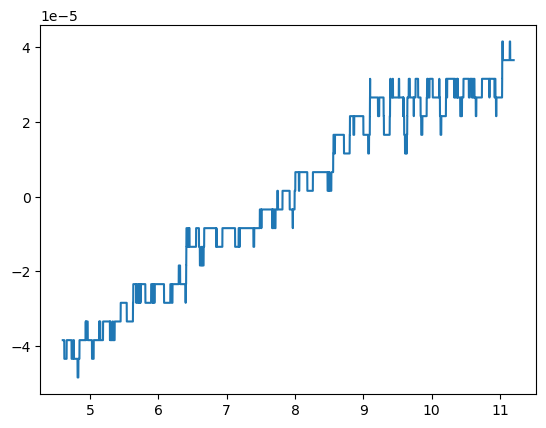

In [2145]:
fig = plt.figure()
plt.plot(t,x_r)
#plt.plot(Timestamp2,Rotary_disp2)

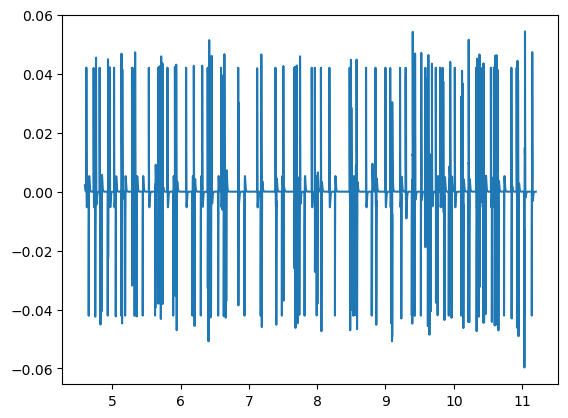

In [2146]:
fig = plt.figure()
plt.plot(t,f_r)
#plt.plot(Timestamp2,Rotary_disp2)

In [2147]:
sliced_data1['Timestamp'] = sliced_data1['Timestamp'] - sliced_data1.iloc[0]['Timestamp']
sliced_data1

,Timestamp,Position,Reaction Force,Apllied Force,Impedence
138318,0.000000,0.000115,0.802216,0.8,6978.199530
138319,0.000033,0.000115,0.802202,0.8,6978.082115
138320,0.000066,0.000115,0.802189,0.8,6977.965346
138321,0.000098,0.000115,0.802176,0.8,6977.852741
138322,0.000130,0.000115,0.802163,0.8,6977.740738
...,...,...,...,...,...
336060,6.599822,0.000190,0.799999,0.8,4211.976278
336061,6.599855,0.000190,0.799999,0.8,4211.976311
336062,6.599887,0.000190,0.799999,0.8,4211.976343
336063,6.599920,0.000190,0.799999,0.8,4211.976375


# Slicing and Writing to seperate files (30000 per file)

In [2148]:
#Slice_count = np.where([sliced_data1['Timestamp']<=4])
#Slice_count = Slice_count[1][-1]
Slice_count = 30000
g_velocity = 100;
g_acceleration = 100;

In [2149]:
for i in range(5):
    df2 = sliced_data1[i*(Slice_count):(i+1)*(Slice_count)]
    df2 = df2.reset_index()
    df2 = df2.drop('index',axis=1)
    df2['Timestamp'] = df2['Timestamp'] - df2.iloc[0]['Timestamp']
    df2['Position'] = df2['Position'] - df2['Position'].mean() 
    df2['Reaction Force'] = df2['Reaction Force'] - df2['Reaction Force'].mean()
    df2['Velocity']= 0
    df2['Position_sum']= 0
    df2['Velocity_sum']= 0
    df2['Stiffness']= df2['Impedence']
    df2['Acceleration']= 0
    for k in range(1,len(df2)):
        df2['Position_sum'][k]= df2['Position_sum'][k-1]+df2['Velocity'][k-1]*(df2['Timestamp'][k]-df2['Timestamp'][k-1])
        df2['Velocity'][k]= g_velocity*(df2['Position'][k]-df2['Position_sum'][k])
        df2['Velocity_sum'][k]= df2['Velocity_sum'][k-1]+df2['Acceleration'][k-1]*(df2['Timestamp'][k]-df2['Timestamp'][k-1])
        df2['Acceleration'][k]= g_acceleration*(df2['Velocity'][k]-df2['Velocity_sum'][k])
    df2['F*x area'] = df2['Reaction Force']*df2['Position']
    df2 = df2.drop('Impedence',axis=1)
    df2 = df2.drop('Position_sum',axis=1)
    df2 = df2.drop('Velocity_sum',axis=1)
    df2 = df2.drop('Apllied Force',axis=1)
    df2 = df2.drop('Timestamp',axis=1)
    df2.to_csv("D:\FYP_ML\Processed Data\S4\S4_" + str(i+1016) +".csv",index=False)


In [2150]:
len(df2)

30000